In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# 1-1

h=0.2로 동일하게 간격이 나누어진 uniform nodes를 사용하여, 본 함수의 Lagrange interpolating
polynomial p(x) 를 찾고 그리시오.

In [2]:
def func(x):
    return 1/(1+16*x**2)

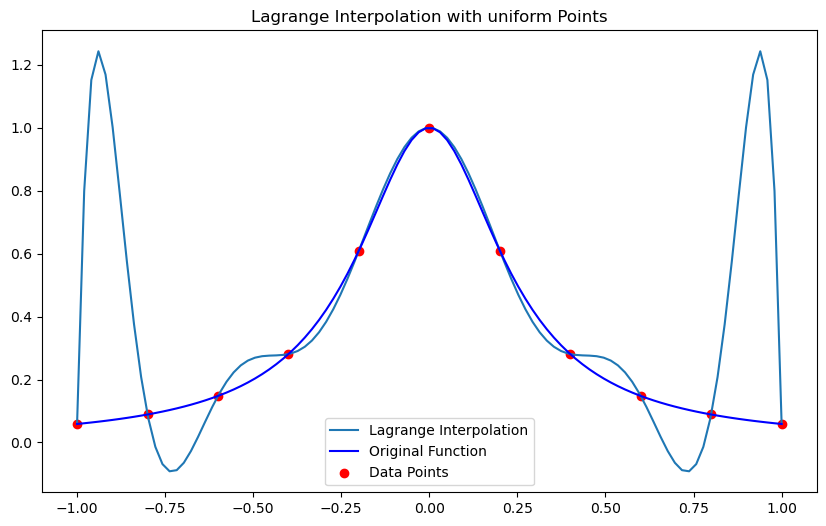

In [3]:
a = 100
list = np.linspace(-1, 1, a)
list_x = np.linspace(-1, 1, 11)
list_y = func(list_x)


for k in range(len(list_x)):
    if k == 0:
        list_L = np.zeros(len(list))
    L_int = np.ones(len(list))
    for n in range(len(list_x)):
        if n != k:
            L_int = L_int*(list-list_x[n])/(list_x[k]-list_x[n])
    list_L = list_L + L_int*list_y[k]

plt.figure(figsize=(10, 6))
plt.plot(list, list_L, label='Lagrange Interpolation')
plt.plot(list, func(list), label='Original Function', color='blue')
plt.scatter(list_x, list_y, color='red', label='Data Points')
plt.title('Lagrange Interpolation with uniform Points')
plt.legend()

# 1-2

동일한 과정을 Chebyshev nodes를 사용하여 진행하시오.

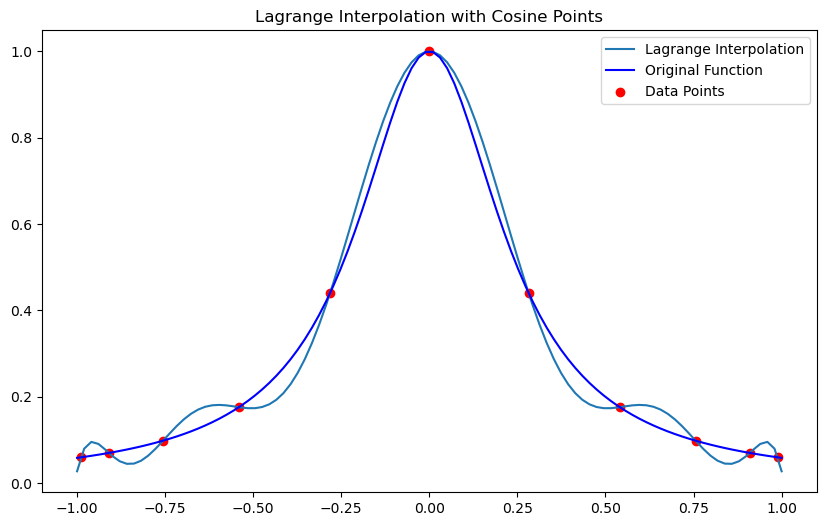

In [4]:
a = 100
list = np.linspace(-1, 1, a)
list_x = np.linspace(0, 10, 11)
list_x_cos = np.cos((2*list_x+1)/(2*10+2)*np.pi)
list_y = func(list_x_cos)


for k in range(len(list_x_cos)):
    if k == 0:
        list_L = np.zeros(len(list))
    L_int = np.ones(len(list))
    for n in range(len(list_x_cos)):
        if n != k:
            L_int = L_int*(list-list_x_cos[n])/(list_x_cos[k]-list_x_cos[n])
    list_L = list_L + L_int*list_y[k]

plt.figure(figsize=(10, 6))
plt.plot(list, list_L, label='Lagrange Interpolation')
plt.plot(list, func(list), label='Original Function', color='blue')
plt.scatter(list_x_cos, list_y, color='red', label='Data Points')
plt.title('Lagrange Interpolation with Cosine Points')
plt.legend()

# 1-3

In [9]:
print(list)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

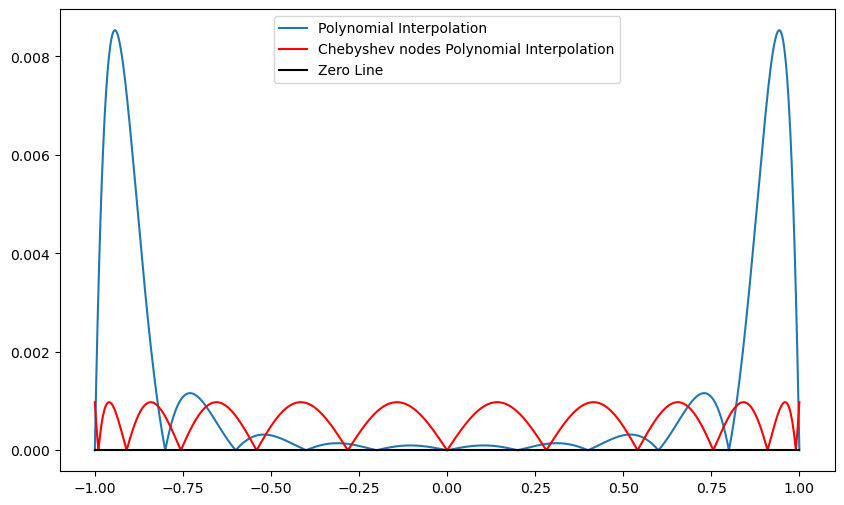

In [15]:
a = 1001
list = np.linspace(-1, 1, a)
list_x = np.linspace(-1, 1, 11)
list_x_cos = np.cos((2*np.linspace(0, 10, 11)+1)/(2*10+2)*np.pi)
pi_uni = np.ones(len(list))
pi_cos = np.ones(len(list))
for i in range(len(list_x)):
    pi_uni = pi_uni * np.abs(list-list_x[i])
    pi_cos = pi_cos * np.abs(list-list_x_cos[i])
    

plt.figure(figsize=(10, 6))
plt.plot(list, pi_uni, label='Polynomial Interpolation')
plt.plot(list, pi_cos, label='Chebyshev nodes Polynomial Interpolation', color='Red')
plt.plot(list, np.zeros(len(list)), label='Zero Line', color='black')
plt.legend()

# 1-4

Cubic spline interpolation 을 사용하여 1,2에 대해 진행하시오.

In [91]:
def func_diff(x):
    return -32*x/(1+16*x**2)**2

In [92]:
def func_diff2(x):
    return 32*(48*x**2-1)/(1+16*x**2)**3

In [93]:
# 토마스 알고리즘
def thomas_algorithm(a, b, c, d):
    n = len(d)
    c_prime = np.zeros(n-1)
    d_prime = np.zeros(n)

    c_prime[0] = c[0] / b[0]
    d_prime[0] = d[0] / b[0]

    for i in range(1, n-1):
        denom = b[i] - a[i-1] * c_prime[i-1]
        c_prime[i] = c[i] / denom
        d_prime[i] = (d[i] - a[i-1] * d_prime[i-1]) / denom

    d_prime[n-1] = (d[n-1] - a[n-2] * d_prime[n-2]) / (b[n-1] - a[n-2] * c_prime[n-2])

    x = np.zeros(n)
    x[-1] = d_prime[-1]

    for i in range(n-2, -1, -1):
        x[i] = d_prime[i] - c_prime[i] * x[i+1]

    return x

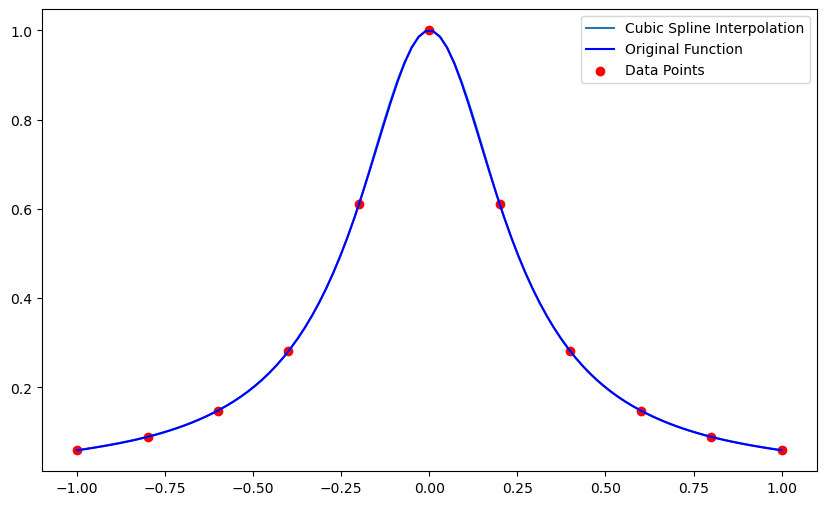

In [94]:
# Cubic Spline Interpolation(uniform nodes)
a = 100
list = np.linspace(-1, 1, a)
list_x = np.linspace(-1, 1, 11)
list_y = func(list_x)
h_list = list_x[1:] - list_x[:-1]

a = np.zeros(len(h_list)-2)
b = np.zeros(len(h_list)-1)
c = np.zeros(len(h_list)-2)

for i in range(len(h_list)-1):
    if i == 0 :
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]
    elif i == len(h_list)-2:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
    else:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]

V = 6*((list_y[2:]-list_y[1:-1])/h_list[1:]-(list_y[1:-1]-list_y[:-2])/h_list[:-1])

M = thomas_algorithm(a, b, c, V)

M = np.concatenate(([0], M, [0]))

a1 = list_y[:-1]
a2 = (list_y[1:]-list_y[:-1])/h_list - (M[1:]+2*M[:-1])/6*h_list
a3 = M[:-1]/2
a4 = (M[1:]-M[:-1])/(6*h_list)

y = []
for i in range(len(list)):
    for j in range(len(list_x)-1):
        if list[i] >= list_x[j] and list[i] <= list_x[j+1]:
            y.append(a1[j] + a2[j]*(list[i]-list_x[j]) + a3[j]*(list[i]-list_x[j])**2 + a4[j]*(list[i]-list_x[j])**3)


plt.figure(figsize=(10, 6))
plt.plot(list, y, label='Cubic Spline Interpolation')
plt.plot(list, func(list), label='Original Function', color='blue')
plt.scatter(list_x, list_y, color='red', label='Data Points')
plt.legend()

In [95]:
print(len(list))
print(len(y))

100
100


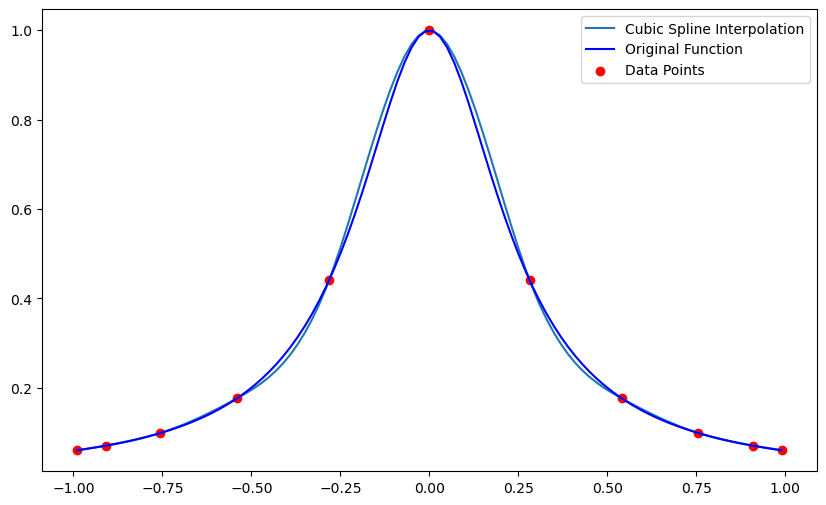

In [96]:
# Cubic Spline Interpolation(Chebyshev nodes)
a = 100

list_x = np.linspace(0, 10, 11)
list_x_cos = np.cos((2*list_x+1)/(2*10+2)*np.pi)
list_x_cos = list_x_cos[::-1]
list_y = func(list_x_cos)
list = np.linspace(list_x_cos[0], list_x_cos[-1], a)
h_list = list_x_cos[1:] - list_x_cos[:-1]

a = np.zeros(len(h_list)-2)
b = np.zeros(len(h_list)-1)
c = np.zeros(len(h_list)-2)

for i in range(len(h_list)-1):
    if i == 0 :
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]
    elif i == len(h_list)-2:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
    else:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]

V = 6*((list_y[2:]-list_y[1:-1])/h_list[1:]-(list_y[1:-1]-list_y[:-2])/h_list[:-1])

M = thomas_algorithm(a, b, c, V)

M = np.concatenate(([0], M, [0]))

a1 = list_y[:-1]
a2 = (list_y[1:]-list_y[:-1])/h_list - (M[1:]+2*M[:-1])/6*h_list
a3 = M[:-1]/2
a4 = (M[1:]-M[:-1])/(6*h_list)

y = []
for i in range(len(list)):
    for j in range(len(list_x_cos)-1):
        if list[i] >= list_x_cos[j] and list[i] <= list_x_cos[j+1]:
            y.append(a1[j] + a2[j]*(list[i]-list_x_cos[j]) + a3[j]*(list[i]-list_x_cos[j])**2 + a4[j]*(list[i]-list_x_cos[j])**3)

plt.figure(figsize=(10, 6))
plt.plot(list, y, label='Cubic Spline Interpolation')
plt.plot(list, func(list), label='Original Function', color='blue')
plt.scatter(list_x_cos, list_y, color='red', label='Data Points')
plt.legend()

# 1-5

Chebyshev node를 사용하여 Lagrangian interpolation과 Cubic spline method를 적용한 결과와 Exact
solution 과의 비교를 통한 Error 분석을 하고, 이에 대한 본인의 의견을 서술하시오.

In [108]:
# Lagrange Interpolation with Chebyshev nodes
a = 100
list = np.linspace(-1, 1, a)
list_x = np.linspace(0, 10, 11)
list_x_cos = np.cos((2*list_x+1)/(2*10+2)*np.pi)
list_y = func(list_x_cos)


for k in range(len(list_x_cos)):
    if k == 0:
        list_L = np.zeros(len(list))
    L_int = np.ones(len(list))
    for n in range(len(list_x_cos)):
        if n != k:
            L_int = L_int*(list-list_x_cos[n])/(list_x_cos[k]-list_x_cos[n])
    list_L = list_L + L_int*list_y[k]

std = np.sum(np.abs(func(list)-list_L))/100
print(std)

0.030605445122341583


In [107]:
# Cubic spline method with Chebyshev nodes
a = 100

list_x = np.linspace(0, 10, 11)
list_x_cos = np.cos((2*list_x+1)/(2*10+2)*np.pi)
list_x_cos = list_x_cos[::-1]
list_y = func(list_x_cos)
list = np.linspace(list_x_cos[0], list_x_cos[-1], a)
h_list = list_x_cos[1:] - list_x_cos[:-1]

a = np.zeros(len(h_list)-2)
b = np.zeros(len(h_list)-1)
c = np.zeros(len(h_list)-2)

for i in range(len(h_list)-1):
    if i == 0 :
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]
    elif i == len(h_list)-2:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
    else:
        a[i-1] = h_list[i]
        b[i] = 2*(h_list[i]+h_list[i+1])
        c[i] = h_list[i+1]

V = 6*((list_y[2:]-list_y[1:-1])/h_list[1:]-(list_y[1:-1]-list_y[:-2])/h_list[:-1])

M = thomas_algorithm(a, b, c, V)

M = np.concatenate(([0], M, [0]))

a1 = list_y[:-1]
a2 = (list_y[1:]-list_y[:-1])/h_list - (M[1:]+2*M[:-1])/6*h_list
a3 = M[:-1]/2
a4 = (M[1:]-M[:-1])/(6*h_list)

y = []
for i in range(len(list)):
    for j in range(len(list_x_cos)-1):
        if list[i] >= list_x_cos[j] and list[i] <= list_x_cos[j+1]:
            y.append(a1[j] + a2[j]*(list[i]-list_x_cos[j]) + a3[j]*(list[i]-list_x_cos[j])**2 + a4[j]*(list[i]-list_x_cos[j])**3)


std = np.sum(np.abs(func(list)-y))/100
print(std)

0.008764421572764204
